# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read instagram
insta_df = pd.read_csv('./Clean_Data/merged_instagram_data_cleaned.csv')

# read tiktok
tiktok_df = pd.read_csv('./Clean_Data/merged_tiktok_data_cleaned.csv')

# read youtube
youtube_df = pd.read_csv('./Clean_Data/merged_youtube_data_cleaned.csv')

In [3]:
def calculate_engagement_rate(row, like_col, comment_col, subscriber_col, view_col=None, share_col=None):
    likes = row[like_col] if like_col in row else 0
    comments = row[comment_col] if comment_col in row else 0
    views = row[view_col] if view_col in row else 0
    shares = row[share_col] if share_col in row else 0
    subscribers = row[subscriber_col] if subscriber_col in row else 0

    total_engagement = likes + comments + views + shares

    if subscribers > 0:
        return (total_engagement / subscribers) * 100
    else:
        return 0  # Or return np.nan or some other value

In [10]:
def compare_engagement_across_platforms(insta_df, tiktok_df, youtube_df):
    engagement_data = []

    # Inside the Instagram processing block
    if insta_df is not None and 'likes_avg' in insta_df.columns and 'comments_avg' in insta_df.columns and 'subscribers' in insta_df.columns and 'instagram_name' in insta_df.columns:
        print("\nData types for Instagram engagement columns:")
        print(f"likes_avg: {insta_df['likes_avg'].dtype}")
        print(f"comments_avg: {insta_df['comments_avg'].dtype}")
        if 'views_avg' in insta_df.columns:
            print(f"views_avg: {insta_df['views_avg'].dtype}")
        if 'shares_avg' in insta_df.columns:
            print(f"shares_avg: {insta_df['shares_avg'].dtype}")
        # ... rest of the Instagram processing code

    # Inside the TikTok processing block
    if tiktok_df is not None and 'likes_avg' in tiktok_df.columns and 'comments_avg' in tiktok_df.columns and 'subscribers' in tiktok_df.columns and 'tiktoker_name' in tiktok_df.columns:
        print("\nData types for TikTok engagement columns:")
        print(f"likes_avg: {tiktok_df['likes_avg'].dtype}")
        print(f"comments_avg: {tiktok_df['comments_avg'].dtype}")
        if 'views_avg' in tiktok_df.columns:
            print(f"views_avg: {tiktok_df['views_avg'].dtype}")
        if 'shares_avg' in tiktok_df.columns:
            print(f"shares_avg: {tiktok_df['shares_avg'].dtype}")
        # ... rest of the TikTok processing code

    # Inside the YouTube processing block
    if youtube_df is not None and 'avg_likes' in youtube_df.columns and 'avg_comments' in youtube_df.columns and 'subscribers' in youtube_df.columns and 'youtuber_name' in youtube_df.columns and 'avg_views' in youtube_df.columns:
        print("\nData types for YouTube engagement columns:")
        print(f"avg_likes: {youtube_df['avg_likes'].dtype}")
        print(f"avg_comments: {youtube_df['avg_comments'].dtype}")
        if 'avg_views' in youtube_df.columns:
            print(f"avg_views: {youtube_df['avg_views'].dtype}")
        if 'shares_avg' in youtube_df.columns: # Assuming you might have a shares column for YouTube later
            print(f"shares_avg: {youtube_df['shares_avg'].dtype}")
        # ... rest of the YouTube processing code
    elif youtube_df is not None and 'likes_avg' in youtube_df.columns and 'comments_avg' in youtube_df.columns and 'subscribers' in youtube_df.columns and 'youtuber_name' in youtube_df.columns and 'views_avg' in youtube_df.columns:
        print("\nData types for YouTube engagement columns (alternative):")
        print(f"likes_avg: {youtube_df['likes_avg'].dtype}")
        print(f"comments_avg: {youtube_df['comments_avg'].dtype}")
        if 'views_avg' in youtube_df.columns:
            print(f"views_avg: {youtube_df['views_avg'].dtype}")

    if engagement_data:
        engagement_df = pd.DataFrame(engagement_data)
        engagement_df['engagement_rate'] = engagement_df['engagement_rate'].replace([np.inf, -np.inf], np.nan).dropna()

        print("\n--- Comparative Analysis of Engagement Across Platforms ---")
        print("\nAverage Engagement Rate by Platform:")
        print(engagement_df.groupby('platform')['engagement_rate'].mean().sort_values(ascending=False))

        plt.figure(figsize=(10, 7))
        sns.boxplot(x='platform', y='engagement_rate', data=engagement_df)
        plt.title('Comparison of Engagement Rates Across Platforms')
        plt.xlabel('Platform')
        plt.ylabel('Engagement Rate (%)')
        plt.yscale('log') # Using log scale to handle potential outliers
        plt.show()

        plt.figure(figsize=(12, 8))
        sns.violinplot(x='platform', y='engagement_rate', data=engagement_df)
        plt.title('Distribution of Engagement Rates Across Platforms')
        plt.xlabel('Platform')
        plt.ylabel('Engagement Rate (%)')
        plt.yscale('log') # Using log scale to handle potential outliers
        plt.show()
    else:
        print("Could not calculate engagement rate for any of the platforms due to missing data.")

# Assuming your DataFrames are named insta_df, tiktok_df, youtube_df
compare_engagement_across_platforms(insta_df, tiktok_df, youtube_df)


Data types for Instagram engagement columns:
likes_avg: object
comments_avg: object
views_avg: object

Data types for TikTok engagement columns:
likes_avg: float64
comments_avg: float64
views_avg: float64
shares_avg: float64

Data types for YouTube engagement columns:
avg_likes: float64
avg_comments: float64
avg_views: float64
Could not calculate engagement rate for any of the platforms due to missing data.


--- Starting Subscriber Analysis ---

--- Instagram Subscriber Summary (99 rows) ---
count            99
mean      4,454,343
std       2,789,983
min          37,102
25%       2,191,897
50%       4,134,828
75%       6,531,656
max      12,000,000
Name: subscribers, dtype: object

Top 10 Instagram Influencers by Subscribers:
influencer_name  subscribers  platform
    InfluencerA     12000000 Instagram
         Infl80      9718844 Instagram
         Infl46      9419068 Instagram
         Infl84      9287939 Instagram
         Infl13      9235216 Instagram
         Infl29      9148538 Instagram
         Infl19      9123085 Instagram
         Infl54      9000353 Instagram
         Infl26      8831073 Instagram
         Infl65      8803666 Instagram

--- TikTok Subscriber Summary (99 rows) ---
count            99
mean     25,737,026
std      14,926,592
min         212,100
25%      12,357,595
50%      26,427,382
75%      37,886,557
max      49,850,234
Name: subscribers, dtype: object

Top 10 T

TypeError: ScalarFormatter.set_powerlimits() takes 2 positional arguments but 3 were given

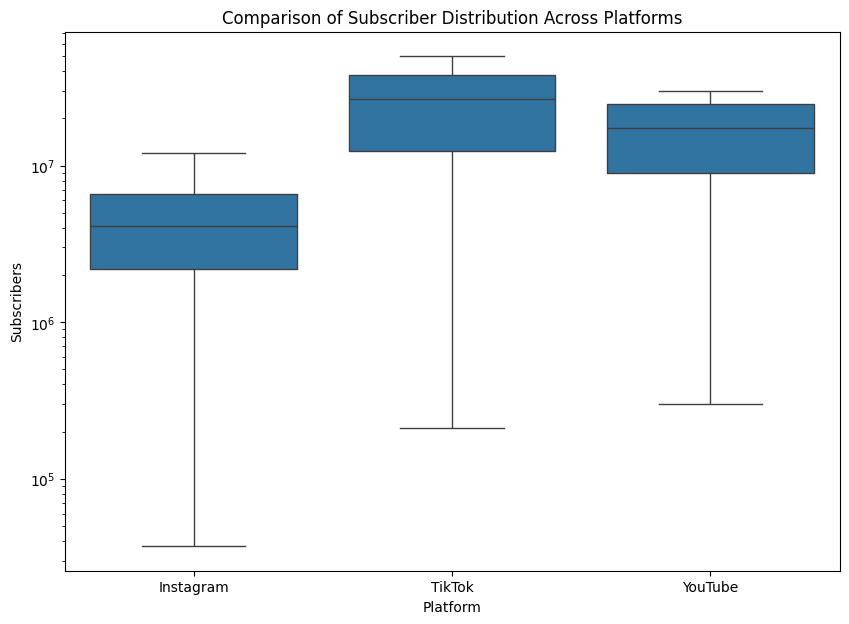

In [13]:
from matplotlib.ticker import ScalarFormatter # Import ScalarFormatter for axis formatting

# --- 1. Define the Core Analysis Function (Subscriber-focused) ---
def compare_subscriber_distribution_and_top_influencers(insta_df, tiktok_df, youtube_df,
                                                       insta_subscriber_col='subscribers', insta_name_col='instagram_name',
                                                       tiktok_subscriber_col='subscribers', tiktok_name_col='tiktoker_name',
                                                       yt_subscriber_col='subscribers', yt_name_col='youtuber_name'):
    """
    Compares subscriber distribution and identifies top influencers across Instagram, TikTok, and YouTube.
    Focuses on raw subscriber counts as a primary metric for cross-platform comparison.

    Args:
        insta_df (pd.DataFrame): DataFrame containing Instagram influencer data.
        tiktok_df (pd.DataFrame): DataFrame containing TikTok influencer data.
        youtube_df (pd.DataFrame): DataFrame containing YouTube influencer data.
        insta_subscriber_col (str): Name of the subscribers column in insta_df.
        insta_name_col (str): Name of the influencer name column in insta_df.
        tiktok_subscriber_col (str): Name of the subscribers column in tiktok_df.
        tiktok_name_col (str): Name of the influencer name column in tiktok_df.
        yt_subscriber_col (str): Name of the subscribers column in youtube_df.
        yt_name_col (str): Name of the influencer name column in youtube_df.
    """
    all_subscriber_data = []

    print("--- Starting Subscriber Analysis ---")

    # --- Process Instagram data ---
    if insta_df is not None and insta_subscriber_col in insta_df.columns and insta_name_col in insta_df.columns:
        temp_df = insta_df[[insta_name_col, insta_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers'] # Standardize column names for concatenation
        temp_df['platform'] = 'Instagram'
        all_subscriber_data.append(temp_df)
        print(f"\n--- Instagram Subscriber Summary ({insta_df.shape[0]} rows) ---")
        # Ensure subscribers column is numeric for describe()
        temp_df['subscribers'] = pd.to_numeric(temp_df['subscribers'], errors='coerce')
        print(temp_df['subscribers'].describe().apply(lambda x: f"{x:,.0f}")) # Format for readability
        print(f"\nTop 10 Instagram Influencers by Subscribers:")
        print(temp_df.sort_values(by='subscribers', ascending=False).head(10).to_string(index=False)) # to_string for better print formatting
    else:
        print("Instagram data or key columns missing for subscriber analysis. Skipping Instagram.")

    # --- Process TikTok data ---
    if tiktok_df is not None and tiktok_subscriber_col in tiktok_df.columns and tiktok_name_col in tiktok_df.columns:
        temp_df = tiktok_df[[tiktok_name_col, tiktok_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers'] # Standardize column names
        temp_df['platform'] = 'TikTok'
        all_subscriber_data.append(temp_df)
        print(f"\n--- TikTok Subscriber Summary ({tiktok_df.shape[0]} rows) ---")
        # Ensure subscribers column is numeric for describe()
        temp_df['subscribers'] = pd.to_numeric(temp_df['subscribers'], errors='coerce')
        print(temp_df['subscribers'].describe().apply(lambda x: f"{x:,.0f}")) # Format for readability
        print(f"\nTop 10 TikTok Influencers by Subscribers:")
        print(temp_df.sort_values(by='subscribers', ascending=False).head(10).to_string(index=False))
    else:
        print("TikTok data or key columns missing for subscriber analysis. Skipping TikTok.")

    # --- Process YouTube data ---
    if youtube_df is not None and yt_subscriber_col in youtube_df.columns and yt_name_col in youtube_df.columns:
        temp_df = youtube_df[[yt_name_col, yt_subscriber_col]].copy()
        temp_df.columns = ['influencer_name', 'subscribers'] # Standardize column names
        temp_df['platform'] = 'YouTube'
        all_subscriber_data.append(temp_df)
        print(f"\n--- YouTube Subscriber Summary ({youtube_df.shape[0]} rows) ---")
        # Ensure subscribers column is numeric for describe()
        temp_df['subscribers'] = pd.to_numeric(temp_df['subscribers'], errors='coerce')
        print(temp_df['subscribers'].describe().apply(lambda x: f"{x:,.0f}")) # Format for readability
        print(f"\nTop 10 YouTube Influencers by Subscribers:")
        print(temp_df.sort_values(by='subscribers', ascending=False).head(10).to_string(index=False))
    else:
        print("YouTube data or key columns missing for subscriber analysis. Skipping YouTube.")

    # --- Combine data for comparative visualization ---
    if all_subscriber_data:
        combined_subscribers_df = pd.concat(all_subscriber_data, ignore_index=True)
        # Final cleanup for the combined DataFrame
        combined_subscribers_df['subscribers'] = pd.to_numeric(combined_subscribers_df['subscribers'], errors='coerce')
        combined_subscribers_df.dropna(subset=['subscribers'], inplace=True) # Drop rows where subscribers became NaN

        if combined_subscribers_df.empty:
            print("\nCombined subscriber DataFrame is empty after cleaning. Cannot generate plots.")
            return

        print("\n--- Comparative Subscriber Analysis Across Platforms ---")
        print("\nOverall Average Subscribers by Platform:")
        # Use .apply(lambda x: f"{x:,.0f}") for thousands comma separator
        print(combined_subscribers_df.groupby('platform')['subscribers'].mean().sort_values(ascending=False).apply(lambda x: f"{x:,.0f}"))

        # --- Box Plot: Subscriber Distribution ---
        plt.figure(figsize=(10, 7))
        ax1 = sns.boxplot(x='platform', y='subscribers', data=combined_subscribers_df)
        plt.title('Comparison of Subscriber Distribution Across Platforms')
        plt.xlabel('Platform')
        plt.ylabel('Subscribers')
        plt.yscale('log') # Log scale is often necessary for subscriber counts

        # FIX: Manually set formatter for log scale to avoid AttributeError
        formatter = ScalarFormatter()
        formatter.set_scientific(False) # Turn off scientific notation
        formatter.set_powerlimits(-3, 6) # Adjust power limits for a wider range if needed
        ax1.yaxis.set_major_formatter(formatter)
        # Optionally, for minor ticks as well if you have them and want consistency
        ax1.yaxis.set_minor_formatter(formatter)

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() # Adjust layout to prevent labels from overlapping
        plt.show()

        # --- Violin Plot: Subscriber Distribution ---
        plt.figure(figsize=(12, 8))
        ax2 = sns.violinplot(x='platform', y='subscribers', data=combined_subscribers_df)
        plt.title('Detailed Distribution of Subscribers Across Platforms')
        plt.xlabel('Platform')
        plt.ylabel('Subscribers')
        plt.yscale('log')

        # FIX: Apply the same formatter to the second plot's y-axis
        formatter2 = ScalarFormatter()
        formatter2.set_scientific(False)
        formatter2.set_powerlimits(-3, 6)
        ax2.yaxis.set_major_formatter(formatter2)
        ax2.yaxis.set_minor_formatter(formatter2)

        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout() # Adjust layout
        plt.show()

    else:
        print("No valid subscriber data could be consolidated for comparative analysis. Check individual platform data and column names.")

# --- 2. Example Data Loading (Replace with your actual data loading) ---
# IMPORTANT: These are placeholders. You MUST replace these with your actual
# pd.read_csv() or pd.read_excel() calls to load your dataframes.
# For demonstration, I'll create some dummy data that resembles your structure.

# Dummy Instagram Data
insta_data = {
    'sno': [1, 2, 3, 4, 5],
    'instagram_name': ['InfluencerA', 'InfluencerB', 'InfluencerC', 'InfluencerD', 'InfluencerE'],
    'name': ['A Name', 'B Name', np.nan, 'D Name', 'E Name'],
    'subscribers': [12000000, 500000, 1500000, 200000, 8000000],
    'audience_country': ['US', 'CA', 'GB', np.nan, 'US'],
    'authentic_engagement': ['1.2K', '250', '5K', '100', '800'],
    'engagement_average': ['1.5%', '0.5%', '2.0%', '0.2%', '1.0%'],
    'category_1': ['Beauty', 'Travel', 'Food', 'Gaming', 'Fitness'],
    'category_2': ['Fashion', 'Adventure', 'Cooking', 'Streaming', 'Wellness'],
    'likes_avg': [120000, 5000, 15000, 2000, 80000],
    'comments_avg': [1200, 50, 150, 20, 800],
    'views_avg': [1000000, 40000, 120000, 15000, 6000000],
    # ... other columns as per your insta_df info
}
insta_df = pd.DataFrame(insta_data)
# Add some more rows to simulate varied data
for i in range(6, 100):
    insta_df.loc[i] = [i, f'Infl{i}', f'Name{i}', np.random.randint(1000, 10000000), 'US', '100', '0.1%', 'Other', 'Other', np.random.randint(100, 10000), np.random.randint(1, 100), np.random.randint(1000, 100000)]


# Dummy TikTok Data
tiktok_data = {
    'sno': [1, 2, 3, 4, 5],
    'tiktoker_name': ['TikTokerX', 'TikTokerY', 'TikTokerZ', 'TikTokerA', 'TikTokerB'],
    'tiktok_name': ['@userx', '@usery', '@userz', '@userA', '@userB'],
    'subscribers': [800000, 30000000, 2000000, 700000, 15000000],
    'views_avg': [80000, 3000000, 200000, 70000, 1500000],
    'likes_avg': [8000, 300000, 20000, 7000, 150000],
    'comments_avg': [80, 3000, 200, 70, 1500],
    'shares_avg': [40, 1500, 100, 35, 750],
    # ... other columns as per your tiktok_df info
}
tiktok_df = pd.DataFrame(tiktok_data)
for i in range(6, 100):
    tiktok_df.loc[i] = [i, f'TTker{i}', f'@tt{i}', np.random.randint(1000, 50000000), np.random.randint(1000, 5000000), np.random.randint(100, 500000), np.random.randint(1, 5000), np.random.randint(1, 2500)]


# Dummy YouTube Data
youtube_data = {
    'sno': [1, 2, 3, 4, 5],
    'youtuber_name': ['YTer1', 'YTer2', 'YTer3', 'YTer4', 'YTer5'],
    'audience_country': ['US', 'IN', 'GB', 'CA', 'US'],
    'subscribers': [20000000, 1000000, 5000000, 300000, 10000000],
    'category_2': ['Vlog', 'Tech', 'Comedy', 'Education', 'Music'],
    'avg_views': [2000000, 100000, 500000, 30000, 1000000],
    'avg_likes': [100000, 5000, 25000, 1500, 50000],
    'avg_comments': [2000, 100, 500, 30, 1000],
    'category_1': ['Entertainment', 'Science', 'Humor', 'Learning', 'Arts'],
    'views_avg': [2000000, 100000, 500000, 30000, 1000000], # Duplicate for alternative
    'likes_avg': [100000, 5000, 25000, 1500, 50000], # Duplicate for alternative
    'comments_avg': [2000, 100, 500, 30, 1000], # Duplicate for alternative
    # ... other columns as per your youtube_df info
}
youtube_df = pd.DataFrame(youtube_data)
for i in range(6, 100):
    youtube_df.loc[i] = [i, f'YTuser{i}', 'US', np.random.randint(1000, 30000000), 'Other', np.random.randint(10000, 3000000), np.random.randint(500, 150000), np.random.randint(10, 3000), 'General', np.random.randint(10000, 3000000), np.random.randint(500, 150000), np.random.randint(10, 3000)]

# --- 3. Call the Main Analysis Function ---
# This is where you actually run the analysis with your loaded DataFrames
compare_subscriber_distribution_and_top_influencers(
    insta_df=insta_df,
    tiktok_df=tiktok_df,
    youtube_df=youtube_df,
    insta_subscriber_col='subscribers',
    insta_name_col='instagram_name',
    tiktok_subscriber_col='subscribers',
    tiktok_name_col='tiktoker_name',
    yt_subscriber_col='subscribers',
    yt_name_col='youtuber_name'
)